In [21]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import matplotlib.pyplot as plt

import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'speeches_rev.csv'

# Read the CSV file into a DataFrame
all_speeches = pd.read_csv(csv_file_path)



In [3]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
 
tokenizer_name = "ESGBERT/EnvRoBERTa-environmental"
model_name = "ESGBERT/EnvRoBERTa-environmental"
 
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name, max_len=512)
 
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer) # set device=0 to use GPU
 
# See https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline
print(pipe("Scope 1 emissions are reported here on a like-for-like basis against the 2013 baseline and exclude emissions from additional vehicles used during repairs.", padding=True, truncation=True))


[{'label': 'environmental', 'score': 0.9789981245994568}]


In [22]:

# Apply the environmental classification model to all speeches
all_speeches['environment'] = all_speeches['speech'].apply(lambda speech: pipe(speech, padding=True, truncation=True))



In [23]:
from pandas import json_normalize

all_speeches = pd.concat([all_speeches, json_normalize(all_speeches['environment'])], axis=1)
print(all_speeches)


      id        date                         name  year  \
0      1  2023-07-22          HE Haitham Al Ghais  2023   
1      2  2023-06-26          HE Haitham Al Ghais  2023   
2      3  2023-05-22          HE Haitham Al Ghais  2023   
3      4  2022-11-16          HE Haitham Al Ghais  2022   
4      5  2022-07-05  HE Mohammad Sanusi Barkindo  2022   
..   ...         ...                          ...   ...   
332  333  2003-09-11    Dr. Alvaro Silva-Calderón  2003   
333  334  2003-09-08    Dr. Alvaro Silva-Calderón  2003   
334  335  2003-08-21    Dr. Alvaro Silva Calderón  2003   
335  336  2003-07-25    Dr. Alvaro Silva Calderón  2003   
336  337  2003-07-09    Dr. Alvaro Silva Calderón  2003   

                                                header  \
0                    Remarks by OPEC Secretary General   
1                    Address by OPEC Secretary General   
2                    Address by OPEC Secretary General   
3    OPEC Statement to the UN Climate Change Confer...   
4

In [24]:

# Assuming 'environment' column contains a list with 'score' and 'label'
all_speeches[['environment_score', 'environment_label']] = all_speeches['environment'].apply(lambda x: pd.Series([x[0]['score'], x[0]['label']]))

# Print the DataFrame with the new columns
print(all_speeches[[ 'environment_score', 'environment_label']])



     environment_score environment_label
0             0.958944     environmental
1             0.856266     environmental
2             0.897350     environmental
3             0.880450     environmental
4             0.909931     environmental
..                 ...               ...
332           0.853801     environmental
333           0.820266              none
334           0.820218     environmental
335           0.651864              none
336           0.712586     environmental

[337 rows x 2 columns]


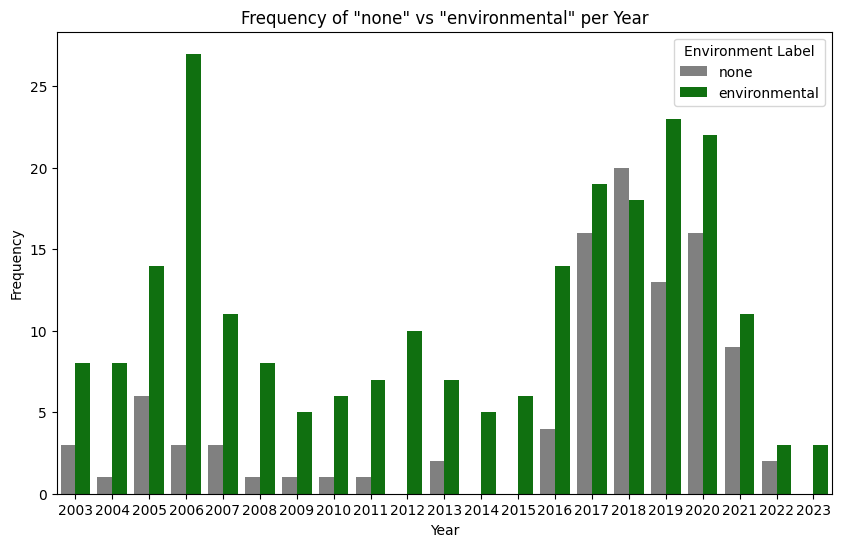

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set custom colors
custom_palette = {'none': 'gray', 'environmental': 'green'}

# Plot the frequency of each label per year with custom colors
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='environment_label', data=all_speeches, order=sorted(all_speeches['year'].unique()), palette=custom_palette)
plt.title('Frequency of "none" vs "environmental" per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Environment Label')
plt.show()


<Figure size 1000x600 with 0 Axes>

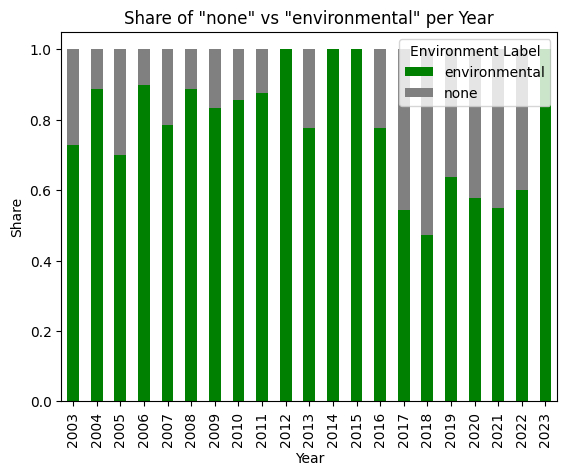

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with counts for each label and year
label_counts = all_speeches.groupby(['year', 'environment_label']).size().unstack(fill_value=0)

# Normalize the counts to get proportions
label_proportions = label_counts.div(label_counts.sum(axis=1), axis=0)

# Plot a stacked bar plot with custom colors
plt.figure(figsize=(10, 6))
label_proportions.plot(kind='bar', stacked=True, color=['green', 'gray'])
plt.title('Share of "none" vs "environmental" per Year')
plt.xlabel('Year')
plt.ylabel('Share')
plt.legend(title='Environment Label')
plt.savefig('environmental_topic.png')
plt.show()
